# Using Exploratory Data Analysis to Generate Movie Insights for Microsoft.

## Overview.

The film industry has been one of the fastest growing markets in recent years. According to research by the [Global News Wire](https://www.globenewswire.com/news-release/2022/03/08/2398616/0/en/Film-And-Video-Global-Market-Report-2022.html), the global movies and entertainment market size was valued at USD 94.451 Billion in 2022. Movies are a significant part of culture and a major source of entertainment for a large part of the global population and with regards to revenue, the market is predicted to grow to an estimated USD 169.62 Billion by 2030 with a compound annual growth rate of roughly 7.21% between 2023 and 2030. This makes it a valuable investment to consider.

The movie industry is a highly competitive and complex field that involves various stages of production, including development, pre-production, production, post-production, and distribution.
Success in the movie industry depends on factors such as compelling storytelling, engaging characters, high production values, effective marketing, and distribution strategies. Collaboration with experienced professionals, such as writers, directors, producers, and talent agents, is crucial for creating quality films.

## 1.) Business Understanding.

#### Problem Statement.

The growth in popularity of original video content has inspired Microsoft to create a new movie studio to take advantage of this opportunity. However, this may pose a challenge as it is a fairly new industry for them and they lack the necessary insights on what movies to create.

Since Microsoft has no prior experience in creating movies, this exploratory data analysis seeks to find what types of films are currently topping the box office. The findings from this analysis, will be used to come up with recommendations on the best course of action for Microsoft to take when creating their own movies.

## 2.) Data Understanding.

The datasets provided for this analysis were collected from different movie review sites and contain information on the various movie genres and their popularity among viewers.
The datasets include:

* Box Office Mojo
* IMDB
* Rotten Tomatoes
* The Movie DB
* The Numbers

For this analysis, datasets 1, 2 and 4 were used. Their features are as follows:

2.1. From Box Office Mojo

* title - Name of the movie.
* studio - The studio that produced it.
* domestic_gross - The amount of gross earnings from its mother country.
* foreign_gross - The amount of gross earnings from elsewhere around the world.
* year - The year it was released.

2.2. From IMDB Movies:

* movie_id - Unique id for each movie.
* primary_title - The title of the movie once it is internationally released.
* original_title - Original title of the movie.
* start_year - The year the movie was released.
* runtime_minutes - The total length of the movie.
* averagerating - The average rating out of 10.
* numvotes - Number of votes made to rate the movie.

2.3. From The Movie DB:

* genre_id - Unique id for each genre.
* original_language - The original language the movie was produced in.
* original_title - The original title of the movie.
* popularity - The popularity rating of the movie
* release_data - The date the movie was released
* Title - The primary title of the movie
* Voter average - The average votes the movie received out of 10.
* Voter_count - The number of votes the movie received.

## 3.) Data Preparation.

In [1]:
#Importing the relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Loading datasets from our various sources i.e csv
bom_movies = pd.read_csv('bom.movie_gross.csv.gz')
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')


In [3]:
import sqlite3
#Making a connection between sqlite3 database and Python
conn = sqlite3.connect('im.db')
#Getting all tables from sqlite_master
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
#Creating cursor object using connection object
cursor = conn.cursor()
#Executing our sql query
cursor.execute(sql_query)
print("List of tables\n")
#Printing all tables list
print(cursor.fetchall())

List of tables

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


#### a.) Checking and Understanding the data.

In [4]:
#Checking the relevant data from the im.db data ie. movie_basics and movie_ratings tables
q = '''SELECT *
FROM movie_basics;
'''
pd.read_sql(q, conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
movie_basics = pd.read_sql(q, conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
#Checking the movie_ratings table
q1 = '''SELECT *
FROM movie_ratings;
'''
pd.read_sql(q1, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
movie_ratings = pd.read_sql(q1, conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [9]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
#Checking the no of records in the bom csv dataset.
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [11]:
#Further information on the dataset
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
#Checking the no of records in the tmdb_movies dataset
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [13]:
#Further inforamtion on the dataset
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [14]:
'From the information above, it is observed that some columns from the selected datasets seem to have missing values which we shall clarify below.'

'From the information above, it is observed that some columns from the selected datasets seem to have missing values which we shall clarify below.'

#### b.) Checking for missing values, duplicates and other inconsistencies.

Having studied the datasets above and realized several of them have missing values, for this next step we check for duplicates and other inconsistencies and choose the most suitable solution to handle them.


##### Duplicates.

In [15]:
#Checking for duplicates in movie_basics
movie_basics.duplicated().sum()

0

In [16]:
#Checking for duplicates in movie_ratings
movie_ratings.duplicated().sum()

0

In [17]:
#Checking for duplicates in bom_movies
bom_movies.duplicated().value_counts()

False    3387
dtype: int64

In [18]:
tmdb_movies.duplicated().value_counts()

False    26517
dtype: int64

None of the datasets above have any duplicates. In the next process we shall deal with the missing values.

##### Missing values.

In [19]:
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [20]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [21]:
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [22]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## 4.) Data Cleaning.

The common issue in the datasets above is the presense of missing values in some of the columns of movie_basics and bom_movies. In the next process, we will clean the data by dropping the rows with null values as the remaining ones will still be sufficient for analysis.

In [23]:
movie_basics = movie_basics.dropna()
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [24]:
movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [25]:
bom_movies = bom_movies.dropna()
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [26]:
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## 5.) Merging Datasets.

Having carried out the necessary data checks and cleaning processes, we shall now merge the movie_basics and movie_ratings tables from IMDB and the bom_movies and tmdb_movies datasets to allow for analysis.

In [27]:
#Joining the two SQL tables, movie_basics and movie_ratings
cleaned_data = '''SELECT movie_basics.runtime_minutes, movie_basics.genres, 
                  movie_ratings.averagerating, movie_ratings.numvotes
                  FROM (movie_basics, movie_ratings) as cleaned_data
                  WHERE movie_basics.movie_id = movie_ratings.movie_id;
'''
pd.read_sql(cleaned_data, conn)

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
3,NaN,"Comedy,Drama",6.1,13
4,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136
73853,NaN,Documentary,8.5,8
73854,NaN,None,6.6,5


In [28]:
cleaned_data = pd.read_sql(cleaned_data, conn)

In [29]:
cleaned_data.isna().sum()

runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

We now have a single dataset with the relevant columns from the two SQL tables. However, since the number of rows and columns were unmatched, we have ended up with missing values in the runtime_minutes and genres column. We will need to drop the rows with missing values again.

In [30]:
cleaned_data = cleaned_data.dropna()
cleaned_data

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...
73849,130.0,Drama,8.4,365
73850,86.0,Documentary,6.2,5
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136


In [31]:
cleaned_data.isna().sum()

runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [32]:
cleaned_data

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...
73849,130.0,Drama,8.4,365
73850,86.0,Documentary,6.2,5
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136


In [33]:
#Merging the two datasets bom_movies, and tmdb_movies
merged_df = pd.concat([bom_movies, tmdb_movies])
merged_df

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,Laboratory Conditions,NaN,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,Laboratory Conditions,0.6,2018-10-13,0.0,1.0
26513,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,_EXHIBIT_84xxx_,0.6,2018-05-01,0.0,1.0
26514,The Last One,NaN,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,The Last One,0.6,2018-10-01,0.0,1.0
26515,Trailer Made,NaN,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,Trailer Made,0.6,2018-06-22,0.0,1.0


To conduct our analysis we only need a few columns from the merged dataset, that is the domestic_gross, foreign_gross, popularity, and vote_average. The other columns will therefore be dropped.

In [34]:
merged_df.isna().sum()

title                    0
studio               26517
domestic_gross       26517
foreign_gross        26517
year                 26517
Unnamed: 0            2007
genre_ids             2007
id                    2007
original_language     2007
original_title        2007
popularity            2007
release_date          2007
vote_average          2007
vote_count            2007
dtype: int64

In [35]:
#Dropping unneeded columns from the merged dataset
merged_df.drop(['studio','year', 'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'release_date', 'vote_count'], axis=1, inplace=True)
merged_df

,title,domestic_gross,foreign_gross,popularity,vote_average
0,Toy Story 3,415000000.0,652000000,NaN,NaN
1,Alice in Wonderland (2010),334200000.0,691300000,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,NaN,NaN
3,Inception,292600000.0,535700000,NaN,NaN
4,Shrek Forever After,238700000.0,513900000,NaN,NaN
...,...,...,...,...,...
26512,Laboratory Conditions,NaN,NaN,0.6,0.0
26513,_EXHIBIT_84xxx_,NaN,NaN,0.6,0.0
26514,The Last One,NaN,NaN,0.6,0.0
26515,Trailer Made,NaN,NaN,0.6,0.0


Due to the null values, we will drop popularity and vote_average columns.





In [36]:
merged_df.drop(['popularity', 'vote_average'], axis=1, inplace=True)
merged_df

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
26512,Laboratory Conditions,NaN,NaN
26513,_EXHIBIT_84xxx_,NaN,NaN
26514,The Last One,NaN,NaN
26515,Trailer Made,NaN,NaN


As the data in domestic_gross and foreign_gross is critical to our analysis, we shall only drop the rows with the null values.

In [37]:
merged_df = merged_df.dropna()

In [38]:
merged_df

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3275,I Still See You,1400.0,1500000
3286,The Catcher Was a Spy,725000.0,229000
3309,Time Freak,10000.0,256000
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200


## 6.) Exploratory Data Analysis.

In this section we are going to analyze the datasets we have, in order to come up with conclusions and recommendations on what films the Head of Microsoft's new movie studio should consider creating.

##### Exploring the first dataset: movie_basics and movie_ratings

In [39]:
cleaned_data.head(10)

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
7,136.0,Drama,6.8,451
8,100.0,History,4.6,64
9,180.0,Documentary,7.6,53
10,89.0,Drama,6.9,120
11,60.0,Documentary,7.5,6


For this dataset, the goal is to compare the average rating and the number of votes of the genres. This will give us insights into what genres the CEO of Microsoft should base their video content on in order to get the best engagement and reception among viewers. The dataset will also be analyzed for runtime_minutes against averagerating. This will answer the question on determining for how the video should run, to ensure best performance.

##### a.) How does average rating vary with movie genres?

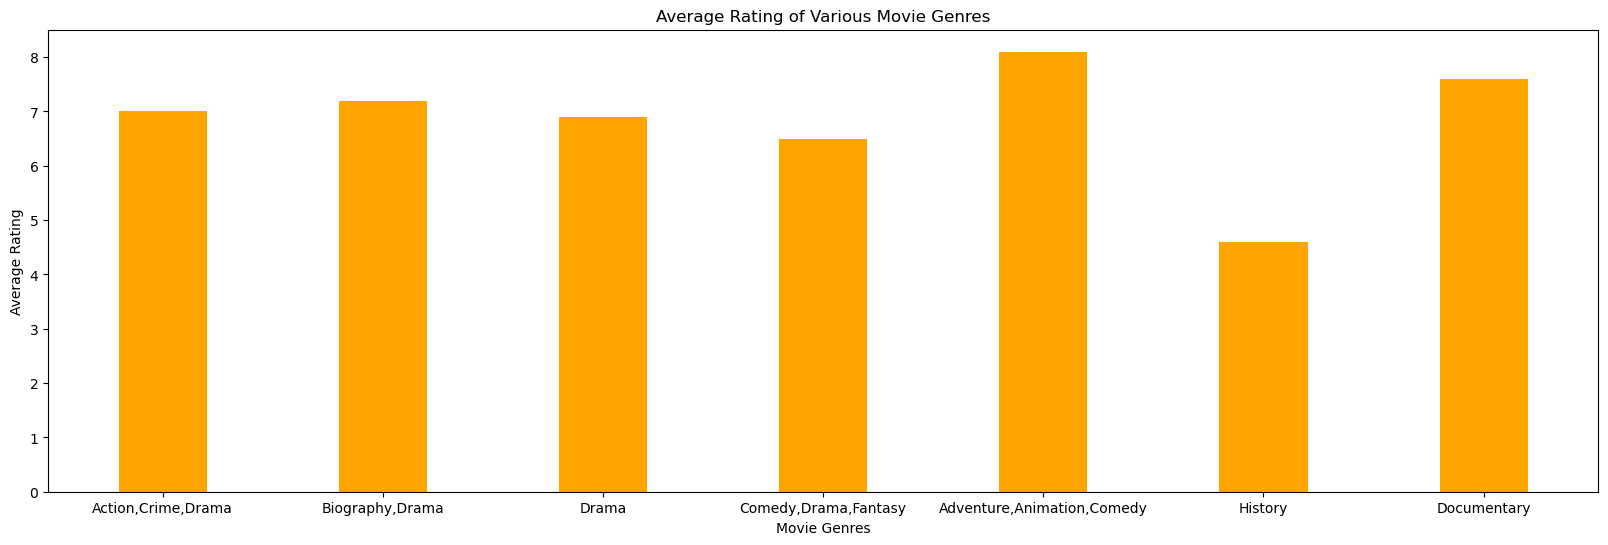

In [40]:
#Plotting a bar graph with genres and averagerating as the variables

plt.data = cleaned_data.head(10)
x = cleaned_data.head(10)['genres']
y = cleaned_data.head(10)['averagerating']


#Plotting the graph using the above data
plt.figure(figsize = (20,6))

#Using the bar() function to create a plot using the above values of x,y
plt.bar(x, y, color ='orange',
        width = 0.4)
 
plt.xlabel("Movie Genres")
plt.ylabel("Average Rating")
plt.title("Average Rating of Various Movie Genres")
plt.show()

The bar plot above indicates that there are not significant differences in average ratings across various movie genres. However, it is worth noting that movies that fall under the combination of Adventure, Animation, and Comedy have the highest average rating. As does the Documentary category. On the other hand, the genres of Horror and Thriller, as well as History and a combination of Comedy and Drama, tend to have lower average ratings.

##### b.) How does number of votes vary according to movie genres?

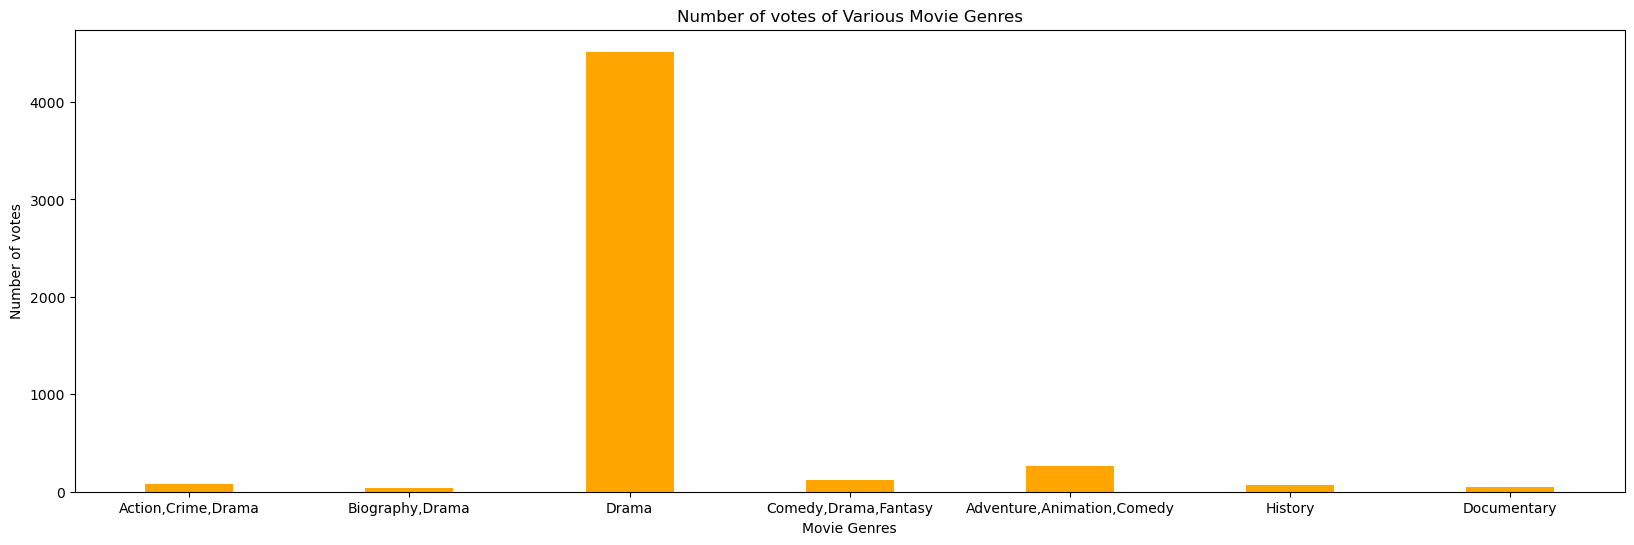

In [41]:
#Plotting a bar graph with genres and averagerating as the variables

plt.data = cleaned_data.head(10)
x = cleaned_data.head(10)['genres']
y = cleaned_data.head(10)['numvotes']


#Plotting the graph using the above data
plt.figure(figsize = (20,6))

#Using the bar() function to create a plot using the above values of x,y
plt.bar(x, y, color ='orange',
        width = 0.4)
 
plt.xlabel("Movie Genres")
plt.ylabel("Number of votes")
plt.title("Number of votes of Various Movie Genres")
plt.show()

The bar plot above indicates that the movie genre with the highest number of votes is the Drama genre, indicating that it has a larger audience base.

##### c.) How does runtime affect average rating?

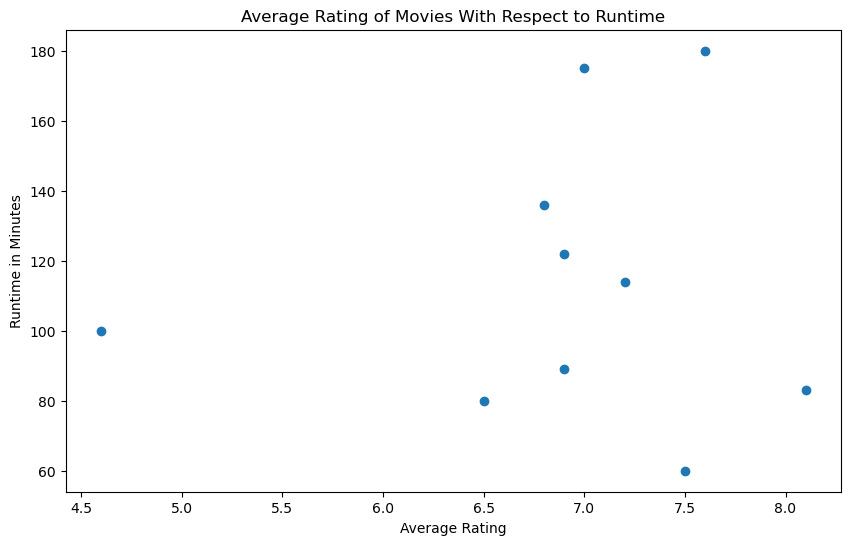

In [42]:
#Plotting a scatterplot with averagerating and runtime_minutes
plt.data = cleaned_data.head(10)

x = cleaned_data.head(10)['averagerating']
y = cleaned_data.head(10)['runtime_minutes']


#Plotting the scatterplot using the above data
plt.figure(figsize = (10,6))

#Creating the scatter plot
plt.scatter(x, y)

#Labelling the scatter plot
plt.xlabel("Average Rating")
plt.ylabel("Runtime in Minutes")
plt.title("Average Rating of Movies With Respect to Runtime")
plt.show()

The data points are quite spread out in the scatter plot above. Which indicates there is no trend to the data and thus, there is no correlation between Runtime in Minutes and Average Rating.

Exploring the second dataset: bom_movies, and tmdb_movies.

##### a.) How does movie performance vary between domestic and foreign markets?

In [49]:
merged_df

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3275,I Still See You,1400.0,1500000
3286,The Catcher Was a Spy,725000.0,229000
3309,Time Freak,10000.0,256000
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200


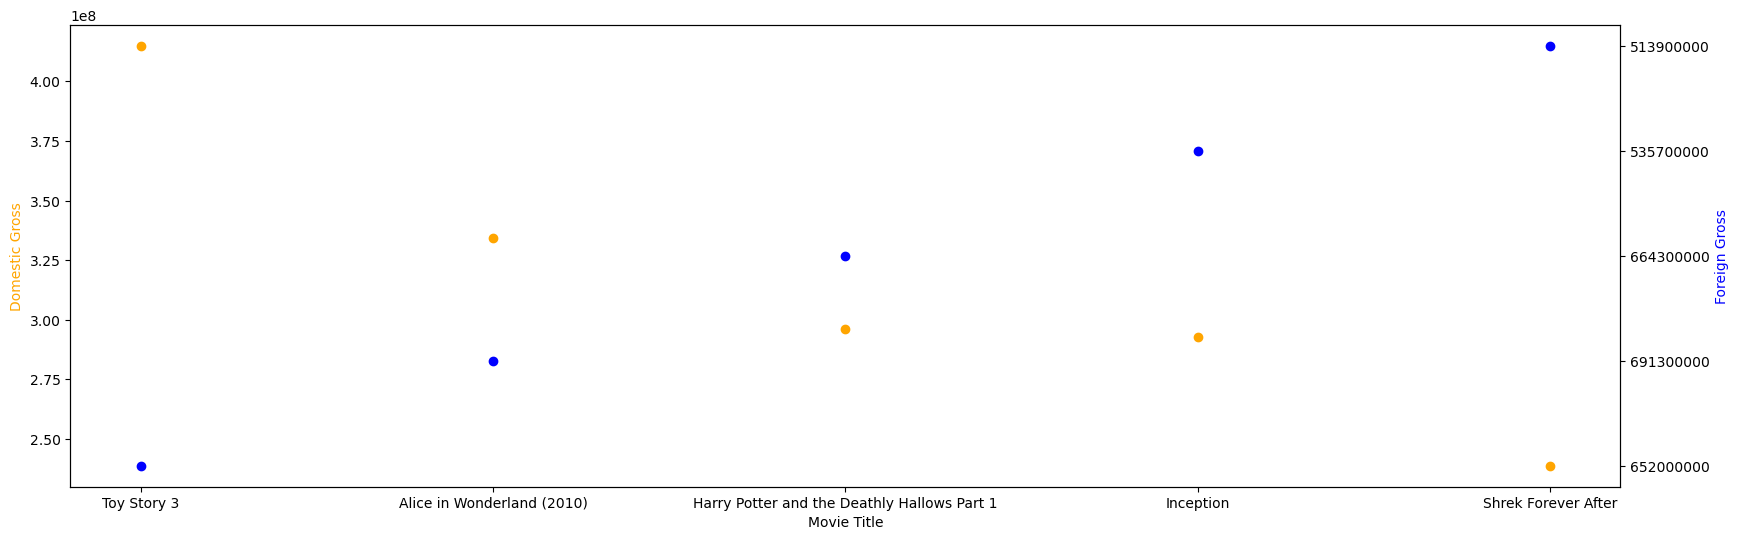

In [50]:
#Plotting a scatter plot with two variables on the y axis, foreign_gross and domestic_gross
plt.data = merged_df.head()
fig, ax1 = plt.subplots()

#Defining the x,y1 and y2 variables
x = merged_df.head()['title']
y1 = merged_df.head()['domestic_gross']
y2 = merged_df.head()['foreign_gross']

#Creating a second y-axis (ax2) that shares the same x-axis (ax1) with the first subplot.
ax2 = ax1.twinx()
ax1.scatter(x, y1, color='orange')
ax2.scatter(x, y2, color='blue')

#Labelling the scatter plot
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Domestic Gross', color='orange')
ax2.set_ylabel('Foreign Gross', color='blue')

plt.gcf().set_size_inches((20, 6))
plt.show()

According to the scatter plot above, "Toy Story 3" exhibits the lowest foreign gross income but the highest domestic income. Conversely, "Shrek Forever After" showcases the lowest domestic income but the highest foreign income. Therefore, when Microsoft explores movie creation opportunities, it becomes crucial to prioritize whether they aim to cater to the foreign or domestic market. By doing so, they can determine the type of movie that would potentially yield the highest income.

## 7.) Conclusions.

From the data analysis above it is clear that movies that fall under the combination of Adventure, Animation, and Comedy have the highest average rating. As does the Documentary category. On the other hand, the genres of Horror and Thriller, as well as History and a combination of Comedy and Drama, tend to have lower average ratings.

It is also clear that the movie genre with the highest number of votes is the Drama genre, suggesting that the genre has a larger audience base and thus greater potential reach.

We also see that "Toy Story 3" exhibits the lowest foreign gross income but the highest domestic income. Conversely, "Shrek Forever After" showcases the lowest domestic income but the highest foreign income. This indicates that "Shrek Forever After" had a stronger international appeal that "Toy Story 3". 

## 8.) Recommendations.

Considering the data, it is evident that adventure, animation, and comedy genres receive higher average ratings compared to other genres. This indicates they have a better reception among viewers.Therefore, Microsoft should consider focusing on creating videos within these genres. As for the runtime, as it appears to have less significance in determining the quality and appeal of movies within the genres, Microsoft has the flexibility of choosing a low or high runtime for their videos without worrying about their potential success.

In addition to adventure, animation, and comedy genres, Microsoft should also consider creating videos within the Drama genre. The genre's high number of votes suggests its significant popularity and engagement level, indicating a large potential audience reach. Thus, including Drama genre videos in their content lineup can help Microsoft tap into a wide and enthusiastic viewer base.

The data above also illustrates the performance of movies in both domestic and foreign markets. The data clearly indicates that movies tend to have varying levels of success in these two markets. However venturing into both markets will allow Microsoft to increase their revenue. Therefore, it is crucial for Microsoft to distinguish their strategies for international distribution and marketing. This will enhance the chances of their movies resonating with audiences and achieving favorable results in both domestic and foreign markets.